# <center> STAT2201 Analysis of Engineering & Scientific Data - Semester 2, 2024 </center>
## <center> Problem Set (Weight: 22\%) - Due  21 October 2024 at 17:00 </center> 

---

The Problem Set comprises 4 questions for a total of 40 marks. Each question has multiple parts.

Your submission should be visually appealing, and all questions should be answered in the order of their appearance. Justify all answers. Provide the code you used to generate any plots and compute statistics.

You submission should be in pdf format and submitted on the blackboard  with the file name: `lastname_firstname_studentID.pdf`. For example, suppose that the student's name is John Smith and the student ID is 123456789. Then, the file name will be `Smith_John_123456789.pdf`.

**Solutions to the Problem Set will be released 8 days after the Problem Set is due and as such, submission after this date will not be possible.**

---

You may want to use Juptyer for the Problem Set in which case you will want to be able to convert it to PDF. The simplest approach is to first export the file as HTML. This is done using menu File > Save and Export Notebook As ... > HTML. You can then use Chrome (or other browser) to print to PDF. (Note: *Although there is a PDF option under the "Save and Export Notebook As ...", this will only work if you have LaTeX and pandoc installed and working with Jupyter.*)  

<span style="color:red">WARNING:</span> You need to check that long code lines in Python and long equations are not truncated in the PDF conversion.

---
<p style="page-break-after:always;"></p>

<b>Name:</b> Blaise Delforce

<b>Student Num:</b> 48021191

<b>Date:</b>10/10/2024 - Sem 2 2024

In [640]:
'''Initial Setup for Code'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm


# CSV Read
traffic = pd.read_csv("Traffic_STAT2201.csv")


**Question 1 [17 marks]:** A study examined the psychoacoustic indicators of pass-by vehicle noise. For the study data was collected from 1500 vehicle pass-bys. For each vehicle pass-by, three noise measurements were recorded as well as the vehicle category and speed. The variables are listed below with the units of measurement.
- LA_max: maximum A-weighted sound level (dBA)
- N50: loudness (sone)
- FS50: fluctuation strength (vacil)
- Category: Passenger cars, Vans, dual-axle heavy vehicles [coded as HD], and multiple-axle heavy vehicles [coded as HM]
- Speed: vehicle speed (km/h)

The data is given in the file `traffic_STAT2201.csv`.

**(a)** State the variable type for *vehicle category* and *fluctuation strength*. (*1 mark*)

In [641]:
print(traffic.dtypes)

Category     object
Speed         int64
LA_max      float64
N50         float64
FS50        float64
dtype: object


The vehicle category is an object type and is a continuous categorical (nominal) variable e.g. different types of vehicles

The fluctuation strength is a continuous variable witth type float64 as it takes on numerical values.

**(b)** Briefly describe a "logic" check for the *vehicle speed*. (*1 mark*)

A logic check is a test to see if all measurements seem to be within the range of physical reasonableness. We can do this by checking the lowest and high (minimum and maximum values) in the data column.


In [642]:
min_speed = traffic['Speed'].min()
max_speed = traffic['Speed'].max()
print(f"Minimum Speed: {min_speed}, Maximum Speed: {max_speed}")

Minimum Speed: 32, Maximum Speed: 106


These values (32->106)km/h depict very reasonable values for car speed, as a typical car has a speedometer ranging from 100-150+

**(c)** Describe the distribution of *fluctuation strength* noting the location, spread and shape of the data. Support your description with one appropriate plot and statistics.  (*4 marks*)

We can describe the distribution of fluctuation strength via first obtaining a summary of the data statistics


In [643]:
#Summary of Data
flucs_stats = traffic['FS50'].describe()
print(flucs_stats)

count    1500.000000
mean        0.483839
std         0.068573
min         0.285796
25%         0.442113
50%         0.477119
75%         0.519114
max         0.907047
Name: FS50, dtype: float64


In [644]:
Range = 0.907047 - 0.295796
print("The Range is", Range)


The Range is 0.611251


Note the median is the 50% variable. A histogram visualisation can then be made to properly represent this data

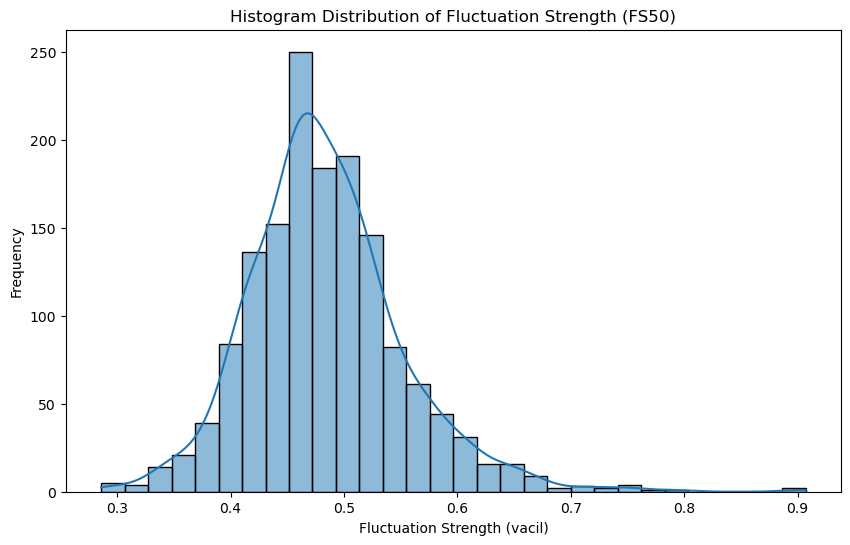

In [645]:
#Histogram of Fluctuation Strength
plt.figure(figsize=(10,6))
sns.histplot(traffic['FS50'], bins=30, kde=True)
# Histogram Labels
plt.title('Histogram Distribution of Fluctuation Strength (FS50)')
plt.xlabel('Fluctuation Strength (vacil)')
plt.ylabel('Frequency')
plt.show()

This is a bimodal distribution with a range of approximately 0.6
1+ Peak implies higher variability and the mean/median's closeness suggest symmetric distribution. Mean being 0.483 and median being 0.477 implies  right skew. Small standard Deviation 0.685 implies a close distribution. Having a positive (right) skew relates to the long tail on the right.

**(d)** Does *fluctuation strength* appear to follow a normal distribution? Use the most appropriate plot to assess this. If the data does not follow a normal distribution, describe how the distribution differs. 
(*3 marks*)

The possibility of a normal distribution can be investigated by plotting a Q-Q plot, similar to a scatter plot.

<function matplotlib.pyplot.show(close=None, block=None)>

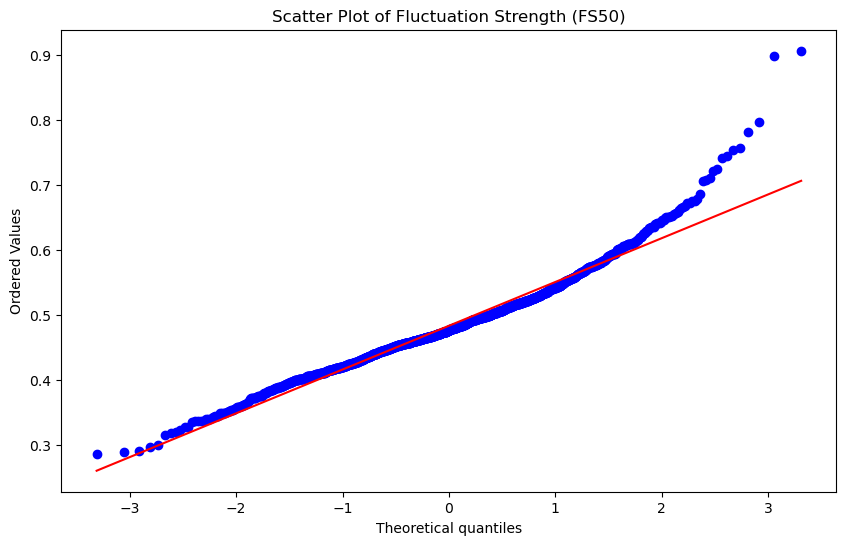

In [646]:
# Quantile (Q-Q) plot
plt.figure(figsize=(10,6))
stats.probplot(traffic['FS50'], dist='norm', plot=plt)
# Labels
plt.title('Scatter Plot of Fluctuation Strength (FS50)')
plt.show

By looking at the above graph, we can determine that the data for fluctuation strength tends to follow only somewhat of a normal distribution
Why is this? Well the x-axis represents quantiles of the normal distribution, whereas the y-axis shows the quantiles of the actual data.

Therefore, if there exists a linear trendline such as that of the red line on the graph, and the data fits the trendline reasonably well, then the data can be said to have high normality.
It is noted, that near the highest and lowest theoretical (normal) quantiles, we see the data tending to stop following the trendline. This prevents the data from being normal.This deviation at the upper tail data which disrupts the normality instead means the data has a heavier right tail than normal.

Essentially, the data tends to follow the pattern of a non- normal distribution with a heavy right tail (than normal)

**(e)** Describe the relationship between *maximum A-weighted sound level* and *vehicle category*. Support your description with one appropriate plot and statistics. (*4 marks*)

The relationship between the max A-weighted sound level and the vehicle category can be uncovered by using a box plot, since we are comparing a quantitative variable to a categorical one. This show should the relationship(s).

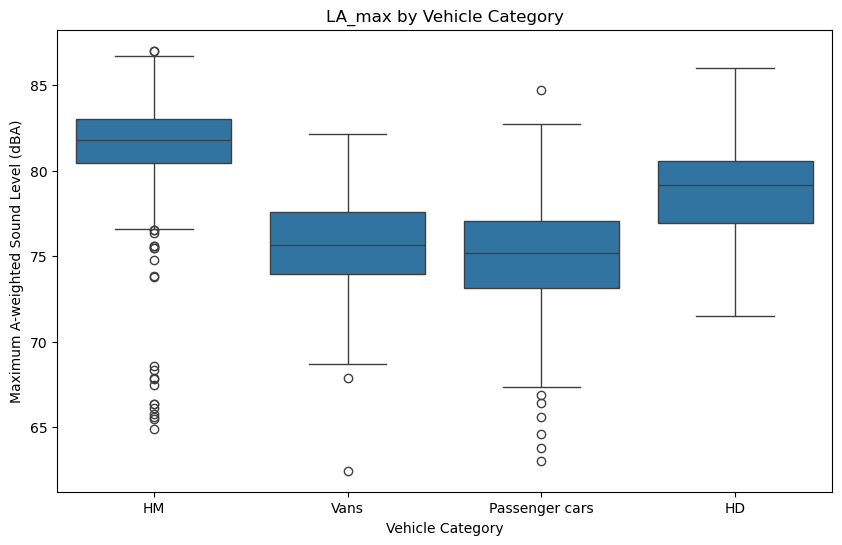

In [647]:
# Boxplot Setup
plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='LA_max', data=traffic)
# Boxplot labels
plt.title('LA_max by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('Maximum A-weighted Sound Level (dBA)')

plt.show()





We note a large quantity of data has just been visualised on the above graph. The first thing to note is the medians (the central tendencies). The Heavy multi-axis vehicles have the highest Maximum A-weighted Sound Level ('LA_max') median (around 82), followed by the Heavy dual-axis vehicles then the vans and passenger cars (around 75). 

In regards to the inter-quartile ranges, it can be seen that the passenger cars have the highest spread whereas the heavy multi-axis have the lowest. This indicates wider and narrower variabilities respectively.

Outliers can also be discussed - we see the most outliers (>12) in the category of heavy multi-axis vehicles, none for heavy dual-axis vehicles, and a couple (<6) for the rest of the categories.

It should also be noted that their seems to be very large symmetry in all of the different categorical data sets.


The quantitative description of this variable can be described by finding the statistical properties of each category using the below code

In [648]:
# Category stats finding
print('---------------------')
print('Data by Category')
print('---------------------')

category_stats = traffic.groupby('Category')['LA_max'].describe()

print(category_stats)
print('---------------------')
print('Overall Data')
print('---------------------')

adb_stats = traffic['LA_max'].describe()
print(adb_stats)

---------------------
Data by Category
---------------------
                count       mean       std        min        25%        50%  \
Category                                                                      
HD               85.0  78.858215  2.652827  71.517914  76.917044  79.158356   
HM              703.0  81.427197  2.808333  64.902698  80.422345  81.785704   
Passenger cars  524.0  75.026739  3.017081  63.037421  73.135327  75.187069   
Vans            188.0  75.547705  2.779717  62.444761  73.974234  75.670880   

                      75%        max  
Category                              
HD              80.578429  85.993224  
HM              83.002635  87.020920  
Passenger cars  77.056960  84.703720  
Vans            77.586618  82.154398  
---------------------
Overall Data
---------------------
count    1500.000000
mean       78.308832
std         4.186524
min        62.444761
25%        75.290591
50%        78.821467
75%        81.763655
max        87.020920
Name:

Using the above quantitative description of the data, we can better understand the general trends. I have made the assumption that in order of weight goes the following: pas. car, van, HD, HM. Now we can discuss the relationships in comparision to third variable.
1. The larger/heavier the vehicle, the lounder the sound (HM Mean  = 81.42, Pas. Car Mean = 74.03)
2. The smaller/lighter the vehicle, the more spread in the data (Pas. Car std = 3.02, HM std = 2.81)
3. The most common vehicle type was the HM (heavy multi-axis vehicle), lowest being the HD (heavy dual-axis vehicle).
4. If we look at the 0.25 and 0.75 quartiles of both LA_max and N50, we note that the the value for the 0.25 quartile increases with weight of the vehicle 


**(f)**  Describe the relationship between *maximum A-weighted sound level* and *loudness*. How does the *vehicle category* affect the relationship between *maximum A-weighted sound level* and *loudness*? Support your description with one appropriate plot and statistics. (*4 marks*)

Firstly, to describe the relationship between max A weighted sound level and loudness, we can graph the general relationship on a scatterplot. 

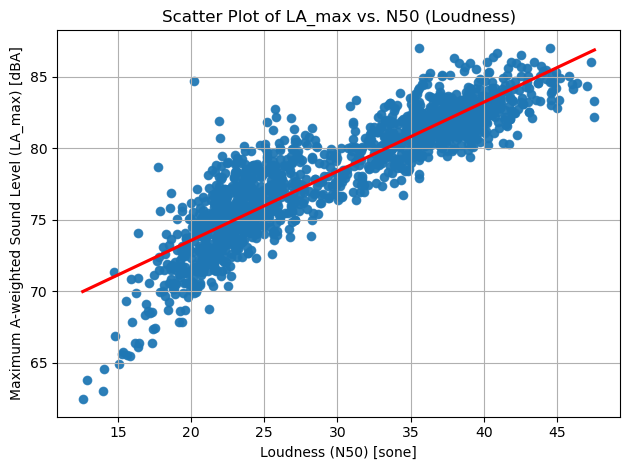

In [649]:
# Plot and trendline setup
sns.scatterplot(x='N50', y='LA_max', data=traffic, alpha=0.7)
sns.regplot(x='N50', y='LA_max', data=traffic, scatter=True, ci=None, line_kws={"color": "red"})
plt.title('Scatter Plot of LA_max vs. N50 (Loudness)')
plt.xlabel('Loudness (N50) [sone]')
plt.ylabel('Maximum A-weighted Sound Level (LA_max) [dBA]')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

We see generally the data follows a positive linear trendline, however the spread/variability is high and although the general trend is clear, the exact relationship will be hard to derive. For example we see at N50 = 15, the LA_max is at around 71, whereas near the higher regions at N50=45, LA_max=85. We also calculate the properties of the data generally below, such as mean/median etc.

In [650]:
n50s = traffic['N50'].describe()
lamx = traffic['LA_max'].describe()
print('---------------------')
print('N50 Data')
print('---------------------')
print(n50s)
print('---------------------')
print('LA_max Data')
print('---------------------')
print(lamx)



---------------------
N50 Data
---------------------
count    1500.000000
mean       29.834831
std         7.724455
min        12.595209
25%        22.961709
50%        28.698788
75%        36.967319
max        47.556982
Name: N50, dtype: float64
---------------------
LA_max Data
---------------------
count    1500.000000
mean       78.308832
std         4.186524
min        62.444761
25%        75.290591
50%        78.821467
75%        81.763655
max        87.020920
Name: LA_max, dtype: float64


Secondly, we can graph the relationship of max A-weighted sound level versus loudness as seperated by category, to properly determine how category affects the relationship between the two quantitiative variables.

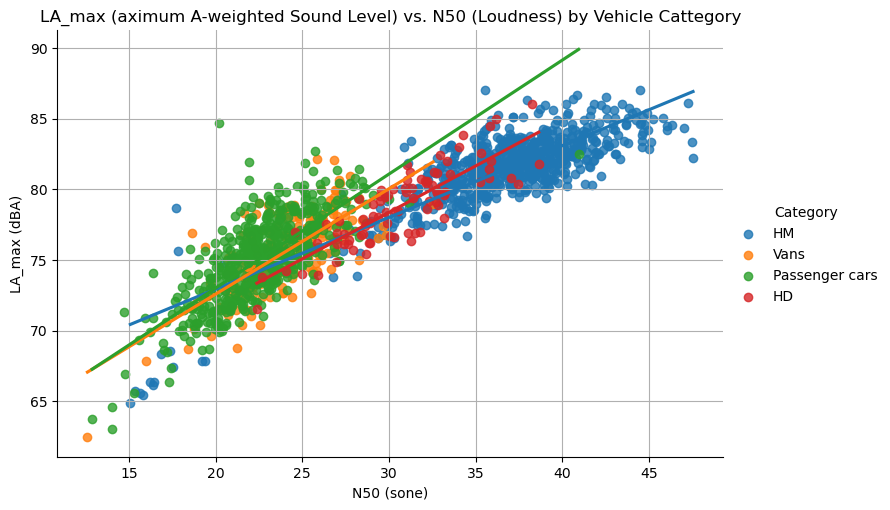

In [651]:

#Plot for the Vehicle Category Versus LA_max
sns.lmplot(x='N50', y='LA_max', hue='Category', data=traffic, aspect=1.5, ci=None)
# Plot Labels
plt.title('LA_max (aximum A-weighted Sound Level) vs. N50 (Loudness) by Vehicle Cattegory')
plt.xlabel('N50 (sone)')
plt.ylabel('LA_max (dBA)')
plt.grid(True)

plt.show()

Despite high spread, we can make out a rough relationship for all vehicles in that the higher the n50, the higher the LA_max. In other words, the LA_max is proportional to the N50.
It is noted that as the weight of the vehicle increases, (AKA as the category of vehicle changes from lowest to highest weight), the following relationships take place (are observed):
1. The gradient of the slope decreases (Max) (The max A-weighted sound level increases by a lower magnitude as loudness increases)
2. The data visually expresses more variance (spread)  in the N50 variable but decreases in the LA_max variable.
3. The data follows a linear trend more thoroughly, in otherwords, visually the data has a higher R^2 value.




<p style="page-break-after:always;"></p>

**Question 2 [8 marks]:** The distribution of file sizes is an important component of internet traffic modelling. Let $Y$ be the size of a randomly selected file in MB. The probability density function of $Y$ is
$$
f(y) = 2\times 10^4 (y + 10^2)^{-3}, \quad y \geq 0,
$$
and $ f(y) = 0 $ for $ y < 0$.  

**(a)** Determine the cumulative distribution function of $Y$. (*3 marks*)

We have the pdf being:
$$
f(y) = 2 \times 10^4 (y + 10^2)^{-3}, \quad y \geq 0
$$
and \( $f(y) = 0$ \) for \( $y < 0$ \).

The CDF \( F(y) \) is obtained by integrating the PDF from 0 to \( y \):

$$
F(y) = \int_{0}^{y} f(t) \, dt = - \left(\frac{100}{y + 100}\right)^2+c_1, \quad y \geq 0
$$

We determine c by knowing $\int f(y)dy = 0$ for $y=0$
$\implies 0=- \left(\frac{100}{0 + 100}\right)^2+c_1$
$\implies c_1= \left(\frac{100}{100}\right)^2 \left(1\right)^2= 1$

So, inserting $c_1=1$ into F(y), we now have:
$F(y) = \int_{0}^{y} f(t) \, dt = 1- \left(\frac{100}{y + 100}\right)^2, \quad y \geq 0$


**(b)** Using your answer from (a) or otherwise, determine the probability that the files size is greater than 1 GB. (*1 mark*)

We need the probability that the file size is greater than 1000MB, so we need to determine $P(f(y)>1000)$.
That is, we need the area under $f(y)$ from $y=1000\rightarrow y=\infty$
This is given by $$P(f(y)>1000)=1-F(1000))$$
$F(1000)= 1- \left(\frac{100}{1000 + 100}\right)^2=1-\left(\frac{100}{1100}\right)^2=1-\frac{1}{121}=\frac{120}{121}$


So we have $$P(f(y)>1000)=1-F(1000))=1-\frac{120}{121}=\frac{1}{121}\approx 0.00826446$$
Thus $P(f(y)>1000)=\frac{1}{121}$




**(c)** Determine the quantile function of $Y$. (*3 marks*)

From before we had $F(y) = 1 - \left(\frac{100}{y + 100}\right)^2, \quad y \geq 0$
\
To find the p-quantile function, we need to first set the CDF equal to F.
$F(y) =p\implies p= 1 - \left(\frac{100}{y + 100}\right)^2, \quad y \geq 0$

Now we need to find a function in terms of p, the quantile. That is, we need y(p)
Let us rearrange for p(y) for y(p)
$$p= 1 - (\frac{100}{y + 100})^2$$
$$1-p= (\frac{100}{y + 100})^2$$
$$1-p= (\frac{100}{y + 100})^2$$

$$(1-p)= (\frac{100}{y + 100})^2$$
$$(1-p)= (\frac{100}{y + 100})^2$$
$$\sqrt{(1-p)}= (\frac{100}{y + 100})$$
$$\sqrt{(1-p)}({y + 100})= {100}$$
$$({y + 100})= \frac{100}{\sqrt{(1-p)}}$$
$${y}= \frac{100}{\sqrt{(1-p)}}-100$$
$${y}= 100(\frac{1}{\sqrt{(1-p)}}-1)$$

So we have the p-quantile function. 
p-quantile function $$= 100(\frac{1}{\sqrt{(1-p)}}-1)$$





**(d)** Using your answer from part (c) or otherwise, determine the file size that is exceeded with probability 0.01. (*1 mark*)

Using answer from c) ->p-quantile function $$= 100(\frac{1}{\sqrt{(1-p)}}-1)$$
We set $1-p= 0.01\implies p=0.99$ since the question asking for the y value (file size) that has f(y)=0.99.
Subbing into equation we have

p-quantile function $$=100(\frac{1}{\sqrt{(1-0.99)}}-1)\implies y=900$$

So file size that is exceeded with probability = 0.01 is 900MB



**Question 3 [3 marks]**: A manufacturer produces resistors whose nominal resistance is 10 ohms. The actual resistance of a random selected resistor has $\mathsf{N}(10, 2.25)$ distribution.

**(a)** What is the probability that a randomly selected resistor has a resistance between 8 and 12 ohms. 
(*1 mark*)

We have $ \mu = 10$ and $ \sigma ^2 = 2.25 \implies \sigma = 1.5$

The probability can be converted into the normalised version using the mean and standard deviation via  $ N(x)=\frac{x-\mu }{ \sigma}$:


$P(8 \leq R \leq 12) = P(\frac{8-10}{1.5} \leq Z \leq \frac{12-10}{1.5}) = P(-1.33 \leq Z \leq 1.33)$
So we need to find difference in the normalised CDF's between the resistance values

This can be calculated using computation:

In [652]:
meanr= 10
sdr = 1.5
# Calculating normalised cdf values of the resistance values
p8 = norm.cdf(8, meanr, sdr)
p12 = norm.cdf(12, meanr, sdr)

# Calculating difference in the normalised CDFs between the normalised resistances
p8to12 = p12 - p8
print(p8to12)

0.8175775605482642


So the probability of the randomly selected resistor have a resistance between 8 and 12 ohms is $ \approx 0.8176$

**(b)** Suppose four independent resistors with respective resistances $R_1,\ldots, R_4$ are connected in series. The total resistance is given by $R_1 + \cdots + R_4$. What value of total resistance is exceeded with probability 0.05? (*2 marks*)

Clearly we have $R_{total}=R_1+R_2+R_3+R_4$

<p style="page-break-after:always;"></p>


Since each chosen resistor has an independent normal random variable that dictates its resistance, then we can  find the total resistances through linear means.
That is, if $R_n∼N( \mu,  \sigma ^2)$ then $ R_{total}∼N(4 \mu, 4 \sigma ^2) $.


Therefore $ R_{total}∼N(40, 3)$ since $ \mu = 4 \times 10 = 40 $ and $\sigma _T ^2=  (4*2.25)=9 \implies \sigma _T = 3$ 

We can then compute using the known equation of $P(R_{Total}> r_{total})=0.05$:

In [653]:
# Calculate value of total resistance that has area under pdf equal to 0.05 past it
meant = 40
sdt = 3

r_t = norm.ppf(0.95, meant, sdt)
print(r_t)

44.93456088085442


So the four resistors in series will have a resistance of $ \approx 44.935 \Omega $ that has is exceeded with the probability 0.05

**Question 4 [12 marks]:** The failure time $T$ of a machine has probability density function 
$$
f(t; \lambda) = \frac{2}{\lambda} e^{-t/ \lambda } - \frac{2}{\lambda} e^{-2 t/\lambda }, \quad t \geq 0,
$$
and $ f(t; \lambda) = 0 $ for $ t < 0$. Here $ \lambda $ is a parameter that must be estimated. Assume that $T_1, \ldots , T_n$ is a random sample from this distribution. Our estimator of $\lambda$ is
$$
\hat{\lambda}_c = \frac{c}{n} \sum_{i=1}^{n} T_{i}.
$$
where c is a constant to be determined. 

**(a)** Show that $\hat{\lambda}_{c} $ is an unbiased estimator of $\lambda$ when $c = 2/3$. (*5 marks*)



$$
\mathbb{E}[T] = \int_0^{\infty} t \cdot f(t; \lambda) \, dt
$$

$$
= \int_0^{\infty} t \left( \frac{2}{\lambda} e^{-\frac{t}{\lambda}} \right) dt - \int_0^{\infty} t \left( \frac{2}{\lambda} e^{-\frac{2t}{\lambda}} \right) dt
$$

### First Integral

$$
\int_0^{\infty} t e^{-\frac{t}{\lambda}} \, dt = \lambda^2 \quad \text{(Integration Using Substitution)}
$$

$$
\int_0^{\infty} t \left( \frac{2}{\lambda} e^{-\frac{t}{\lambda}} \right) dt = \frac{2}{\lambda} \int_0^{\infty} t e^{-\frac{t}{\lambda}} \, dt
$$

$$
= \frac{2}{\lambda} \cdot \lambda^2 = 2 \lambda
$$

### Second Integral

$$
\int_0^{\infty} t e^{-\frac{2t}{\lambda}} \, dt = \frac{\lambda^2}{4}
$$

$$
\int_0^{\infty} t \left( \frac{2}{\lambda} e^{-\frac{2t}{\lambda}} \right) dt = \frac{2}{\lambda} \int_0^{\infty} t e^{-\frac{2t}{\lambda}} \, dt
\quad \text{(Integration using subsitution)}
$$

$$
= \frac{2}{\lambda} \cdot \frac{\lambda^2}{4} = \frac{\lambda}{2}
$$

Now we can use these integral values to find E[T]
$$
E[T]=2 \lambda -\lambda/2 = (4\lambda)/2-\lambda /2 = (3\lambda)/2
$$

Now we can calculate through with the estimator:

From the given probability density function, we have:

$$
E[\lambda]=E[\frac{c}{n} \sum _{i=n}^n*E[T_i]]=\frac{c}{n}*n*E[T]

\implies cE[T]=c* \frac{3*\lambda}{2}
$$
Substituting this into the previous equation, we get:

When $c = \frac{2}{3}$, we have:
$$
\frac{2}{3} * c = λ
$$
Therefore, λ̂ is an unbiased estimator of λ for this c value.

**(b)** It can be shown that $\mathbb{E} (T_{i}^{2}) = \frac{7}{2} \lambda^2$. Determine the variance of $\hat{\lambda}_c$. (*3 marks*)




$$
Var(λ̂) = Var(\frac{c}{n} * Σ T_i)
$$
$$
= \frac{c^2}{n^2}* Var( ΣT_i)

$$
$$
= \frac{c^2}{n^2}*n* Var(T)
$$
$$
= \frac{c^2}{n} * Var(T)
$$
From the given information, we have:

$E[T]= \frac{3 \lambda}{2}$

$E[T^2] = \frac{7λ^2}{2}$

$E[T]^2=\frac{5}{4} \lambda^2$

$$
Var(T) = E[T^2] - (E[T])^2
$$
$$
= \frac{(7λ^2)}{2} - \frac{(9λ^2)}{4}
$$
$$
= \frac{(5λ^2)}{4}
$$


Substituting this into the previous equation, we get:
When c = \frac{2}{3}, we have:

$$
Var(λ̂)= \frac{(c^2)}{n} * Var(T)= \frac{2}{3}^2* \frac{1}{n} * \frac{5}{4} λ^2
$$
$$
= \frac{5}{(9n)} * λ^2
$$

OR
$$
=\frac{5c^2}{(4n)} \lambda^2
$$

**(c)** Apply the central limit theorem to $\hat{\lambda}_{2/3}$ to construct an approximate 95% confidence interval for $\lambda$. 
(*4 marks*)



From the previous parts, we have:
$$
E[λ̂2/3] = λ
$$
$$
Var(\frac{λ̂2}{3}) = \frac{4}{9n} * λ^2
$$
Using the central limit theorem, as n → ∞, $\frac{λ̂2}{3}$ follows a normal distribution with mean λ and variance 4/9n * λ^2.


Note z_0.975 is the 97.5th percentile of the standard normal distribution, which is approximately 1.96.


In [654]:
z_095 = norm.ppf(0.975)
print(z_095)

1.959963984540054


As calculated above, for the 95% confidence interval we have Z=1.96 so the lower/upper parts are -1.96 anf 1.96, as will be substituted in near the end.

The first expression is:
$(\lambda \pm z \times se{(\lambda)})$







$(\lambda \pm z \times se{(\lambda)})$

$P\left(L \le \frac{\lambda _c - \lambda}{se(\lambda) _c} \le U\right)$

$0.95 = P\left(L \le \frac{\lambda_c - \lambda}{se(\lambda _c)} \le U\right)$

$= P\left(L \le \frac{\lambda_{2/3} - \lambda}{\frac{\lambda}{\sqrt{n}} \times \frac{2}{3} \times \sqrt{\frac{5}{4}}} \le U \right)$

$= P\left(\frac{\sqrt{5}}{3}L \le \frac{\sqrt{n}(\lambda_{2/3}-\lambda)}{\lambda}\le \frac{\sqrt{5}}{3}U \right)$

$= P\left(\frac{\sqrt{5}}{3}L \le \frac{\sqrt{n}(\lambda_{2/3})}{\lambda} - \frac{\lambda \sqrt{n}}{\lambda} \le \frac{\sqrt{5}}{3}U \right)$
$= P\left(\frac{\sqrt{5}}{3}L \le \frac{\sqrt{n}(\lambda_{2/3})}{\lambda} - \sqrt{n}\le \frac{\sqrt{5}}{3}U \right)$


$= P\left(\frac{\sqrt{5}}{3}L +{\sqrt n}\le \frac{\sqrt{n} \lambda_{2/3}}{\lambda}\le \frac{\sqrt{5}}{3}U+{\sqrt n}\right)$

$= P\left(\frac{1}{\frac{\sqrt{5}}{3}L +{\sqrt n}}\le \frac{\lambda}{{\sqrt n} \lambda_{2/3}}\le \frac{1}{\frac{\sqrt{5}}{3}U+{\sqrt n}}\right)$


$= P\left(\frac{{{\sqrt n} \lambda_{2/3}}}{\frac{\sqrt{5}}{3}L +{\sqrt n}}\le {\lambda}\le \frac{{{\sqrt n} \lambda_{2/3}}}{\frac{\sqrt{5}}{3}U+{\sqrt n}}\right)$


So the confidence interval (95%) for $\lambda$ is
$= P\left(\frac{{{\sqrt n} \lambda_{2/3}}}{\frac{\sqrt{5}}{3}1.960 +{\sqrt n}}\le {\lambda}\le \frac{{{\sqrt n} \lambda_{2/3}}}{{\sqrt n}-\frac{\sqrt{5}}{3}(1.960)}\right)$
